In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [98]:
def load_data(file_path: str):
    df = pd.read_csv(file_path, index_col='date', parse_dates=True)
    return df

directory_path = 'DATA/VEX_MAGNETO'
file_name = 'VEX-V-Y-MAG-4.csv'

df = load_data(os.path.join(directory_path, file_name))
df.head()

,BX,BY,BZ,BT,XSC,YSC,ZSC,RSC
date,,,,,,,,
2006-04-24 00:00:00,901.170761,887.078621,886.592311,901.582144,-3076.407309,-2872.475157,-67213.437339,67351.778022
2006-04-24 01:00:00,122.866044,107.284161,109.654450,123.584061,-56.789406,-2147.243992,-70446.888658,70485.459712
2006-04-24 02:00:00,230.881530,218.765052,216.810378,234.327848,2966.294489,-1402.796963,-72831.017578,72910.164160
2006-04-24 03:00:00,451.576201,437.057761,440.662270,455.704559,5959.518042,-649.828442,-74422.302150,74668.263456
2006-04-24 04:00:00,560.491882,547.190941,554.806417,566.054039,8894.553522,103.003431,-75259.615454,75788.153991


# Plot the data

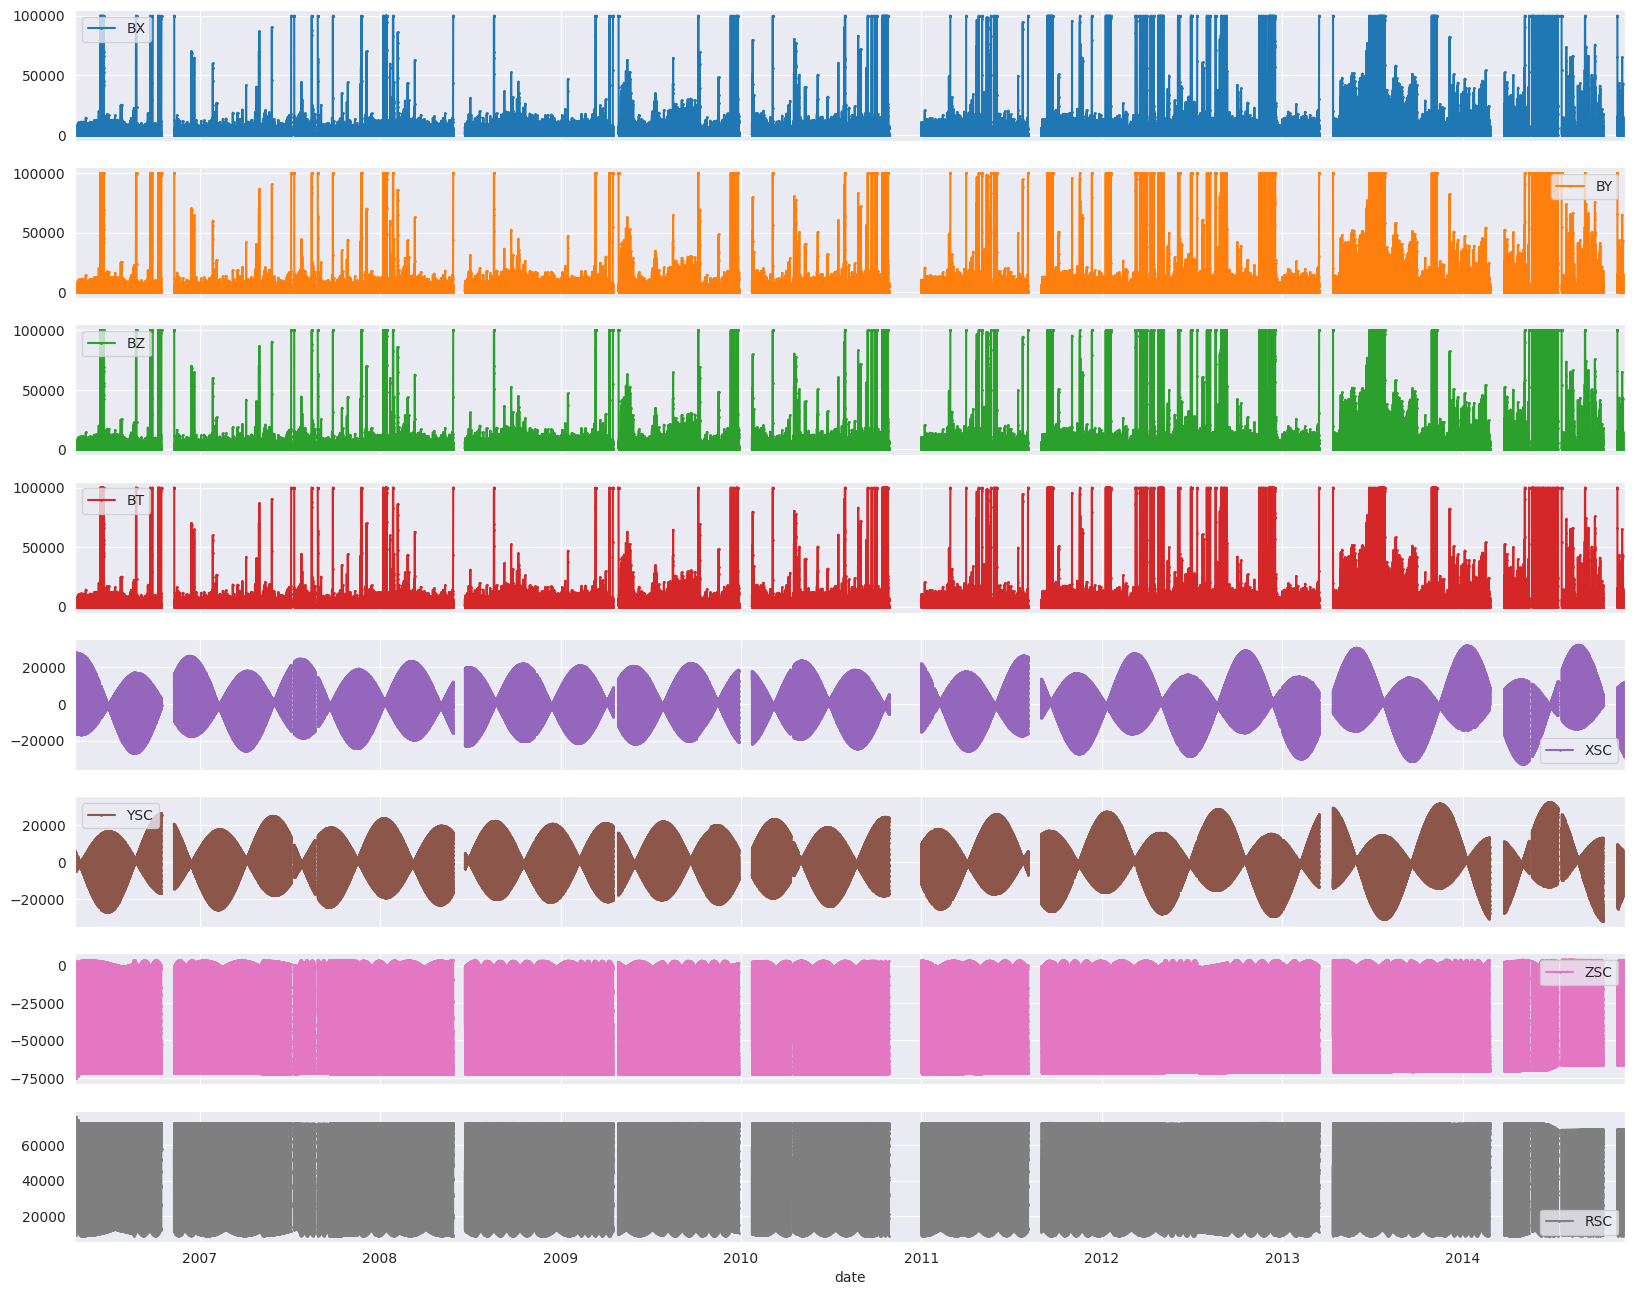

In [99]:
df = df.resample('h').mean()
df.plot(figsize=(20, 16), marker='o', markersize=1, subplots=True)
plt.show()

# Plot total magnetic field

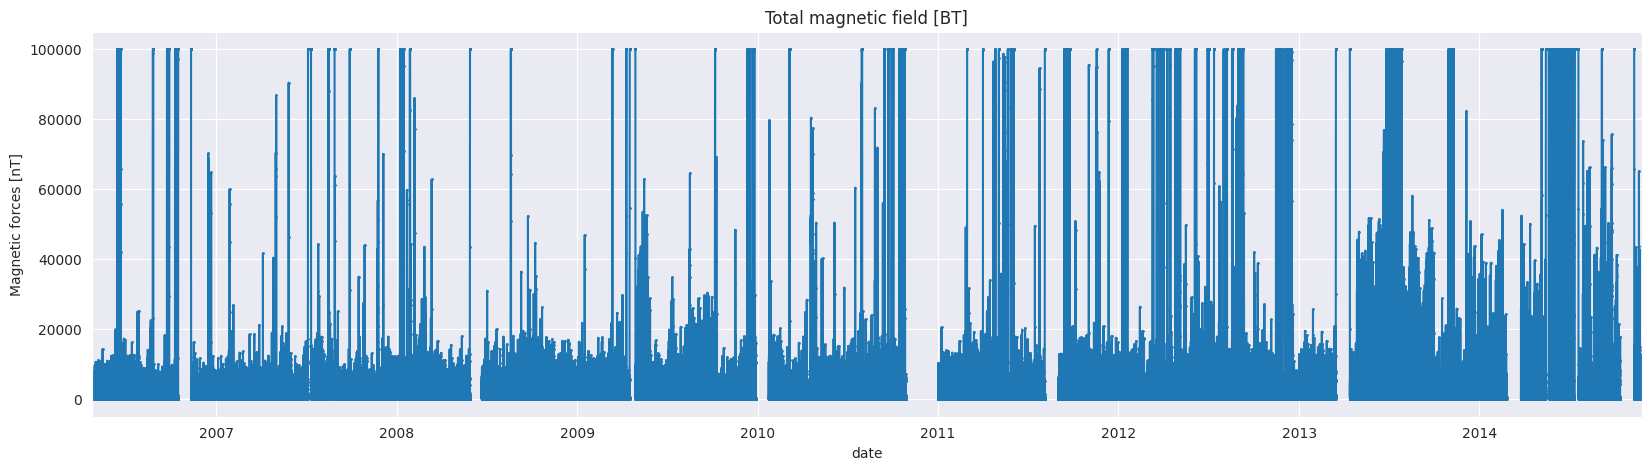

In [100]:
df['BT'].plot(figsize=(20, 5), marker='o', markersize=1, ylabel='Magnetic forces [nT]', title='Total magnetic field [BT]')
plt.show()

# Plot X-Y coordinates in solar coordinates

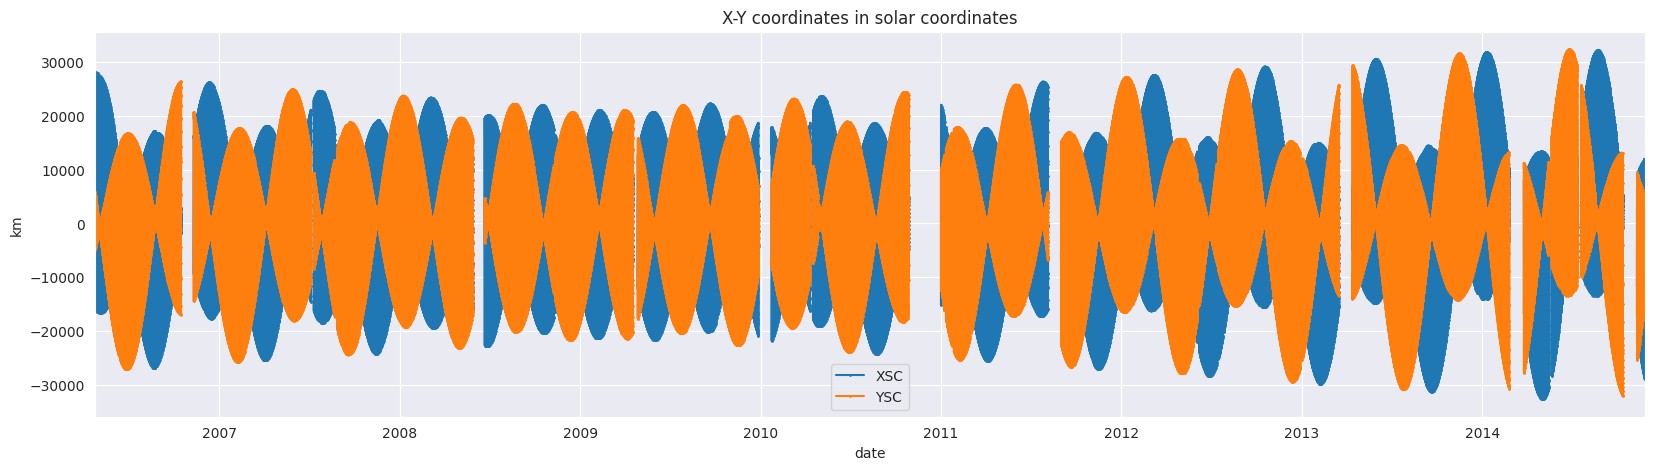

In [101]:
df[df.columns[4:6]].plot(figsize=(20, 5), marker='o', markersize=1, title= "X-Y coordinates in solar coordinates", ylabel="km")
plt.show()

# Plot the distance from the Sun

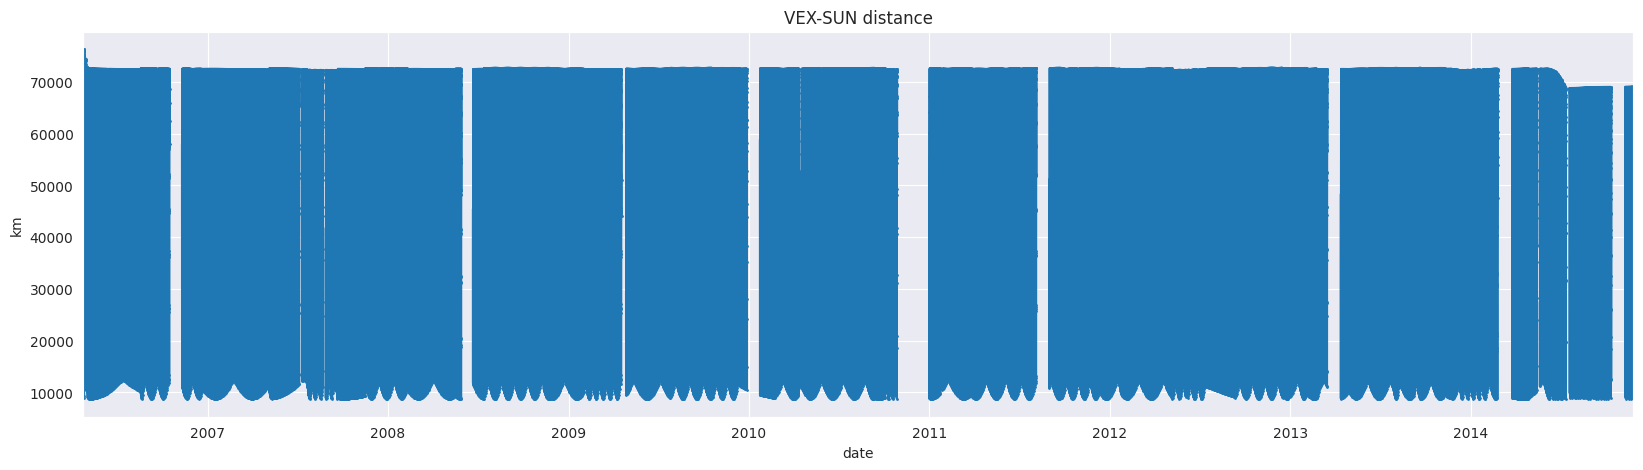

In [102]:
df['RSC'].plot(figsize=(20, 5), marker='o', markersize=1, title= "VEX-SUN distance", ylabel="km")
plt.show()

# PLot the magnetic field with the CME events

In [103]:
data_path = "DATA/VENUS_EXPRESS/"
csv_file_path = data_path + "VEX_CME_date_time.csv"
vex_boundary_df = pd.read_csv(csv_file_path)
vex_boundary_df['start_time'] = pd.to_datetime(vex_boundary_df['start_time'])
vex_boundary_df['end_time'] = pd.to_datetime(vex_boundary_df['end_time'])
vex_boundary_df.head()

,start_time,end_time
0,2007-02-13 04:48:00.000,2007-02-14 09:33:15.840
1,2007-04-27 00:14:24.000,2007-04-27 16:10:33.600
2,2007-05-06 00:43:12.000,2007-05-06 20:52:48.000
3,2007-05-24 19:12:00.000,2007-05-25 19:59:31.200
4,2007-06-16 02:15:21.600,2007-06-16 17:16:48.000


In [104]:
# Add cme column to magneto dataframe
from datetime import datetime, timedelta

# Set the year and day numbers
year = 2006
start_day = 253
end_day = 255

# Calculate the dates
start_date = datetime(year, 1, 1) + timedelta(days=start_day - 1)
end_date = datetime(year, 1, 1) + timedelta(days=end_day - 1)


df = df.loc[start_date:end_date]
m_name = ['BX', 'BY', 'BZ', 'BT']
df[m_name][abs(df[m_name]) > 10000] = 0
df['cme'] = 0
value = df['BT'].max()
for index, row in vex_boundary_df.iterrows():
    df.loc[row['start_time']:row['end_time'], 'cme'] = value
df.head()

/tmp/ipykernel_9096/350403873.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[m_name][abs(df[m_name]) > 10000] = 0
/tmp/ipykernel_9096/350403873.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[m_name][abs(df[m_name]) > 10000] = 0
/tmp/ipykernel_9096/350403873.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,BX,BY,BZ,BT,XSC,YSC,ZSC,RSC,cme
date,,,,,,,,,
2006-09-10 00:00:00,-0.277508,-1.609989,3.839468,6.817954,-22849.997359,12811.154300,-32041.080938,41415.768694,0
2006-09-10 01:00:00,111.611936,105.291957,112.007737,118.881619,-21116.761586,11595.847526,-21198.472797,32151.795742,0
2006-09-10 02:00:00,7892.062483,7886.796654,7886.629703,7895.409832,-16247.702833,8661.222004,-7618.986476,20187.001124,0
2006-09-10 03:00:00,3331.058397,3329.924612,3331.500420,3345.743416,-342.903549,60.669993,3485.135711,8804.409587,0
2006-09-10 04:00:00,2112.712658,2108.487952,2109.005666,2116.195126,13640.032310,-6732.704968,-11316.468060,19261.819042,0


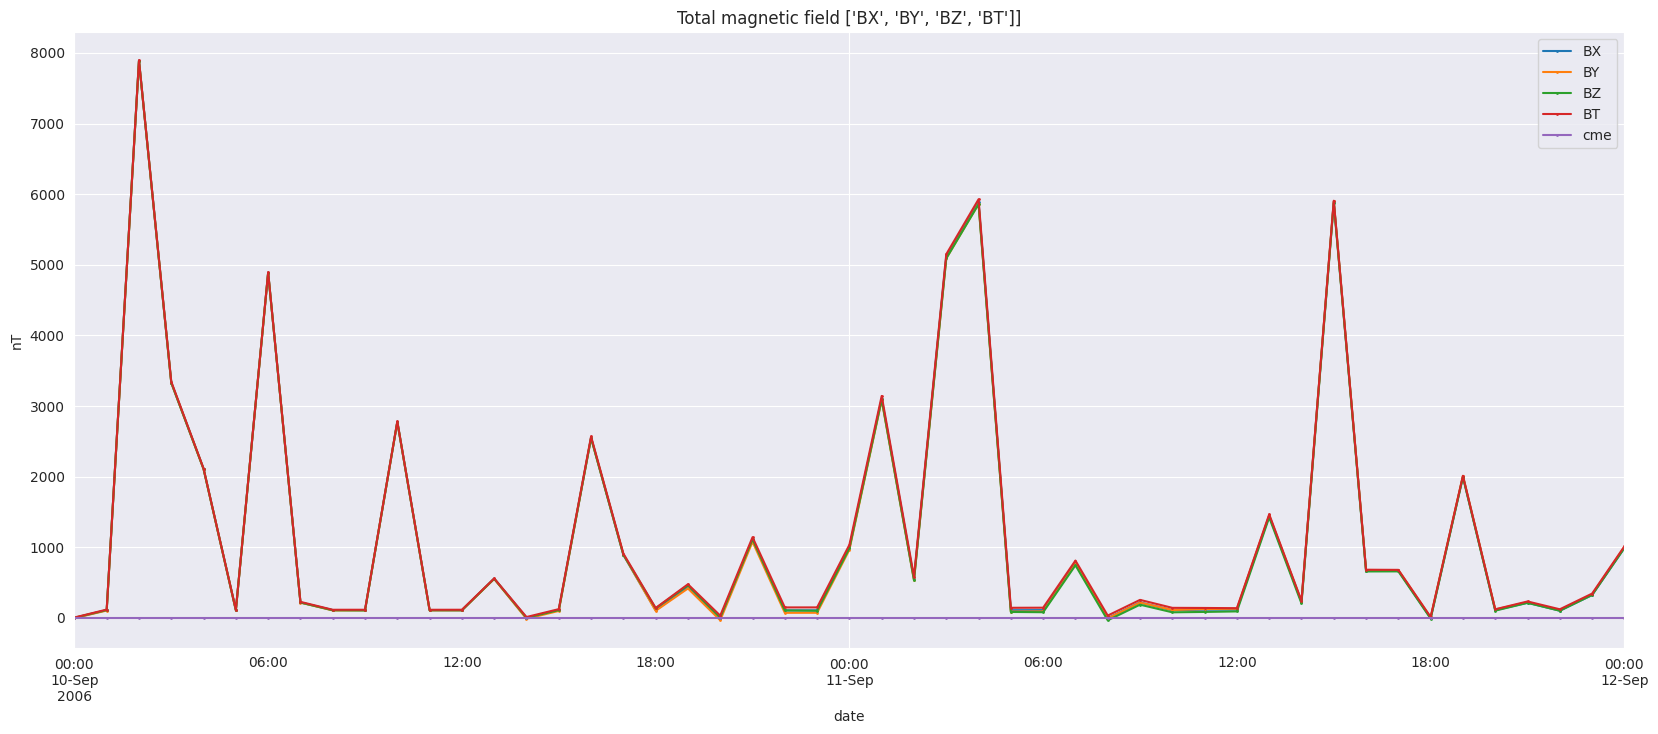

In [106]:
# Plot the magnetic field with the CME events
df[m_name + ['cme']].plot(figsize=(20, 8), marker='o', markersize=1, title= f"Total magnetic field {m_name}]", ylabel="nT")
plt.show()